# Future Sales Prediction:


In [263]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [236]:
import numpy as np
import tensorflow as tf
from tensorflow.python import keras

In [237]:
data1=pd.read_csv("sales_train_v2.csv")
data1.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [238]:
data2=pd.read_csv("salepridict/items.csv")
name=[]
cid=[]
item_idd=np.array(data2)
for i in data1["item_id"]:
    if i in range(len(item_idd)):
        name.append(item_idd[i][0])
        cid.append(item_idd[i][2])
item_name=pd.DataFrame(name, columns=["item_name"])
cat_no=pd.DataFrame(cid,columns=["item_cat_no"])
data=pd.concat([data1,item_name,cat_no], axis=1)


In [239]:
data2.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [240]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_cat_no
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56


In [243]:
data3=pd.read_csv("salepridict/item_categories.csv")
data33=np.array(data3)
cat=[]
for i in data["item_cat_no"]:
    if i in range(len(data33)):
        cat.append(data33[i][0])
catname=pd.DataFrame(cat, columns=["item_category_name"])
data=pd.concat([data,catname],axis=1)

In [244]:
data3.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [245]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_cat_no,item_category_name,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,Музыка - CD фирменного производства


In [82]:
data4=pd.read_csv("salepridict/shops.csv")
d4=np.array(data4)
c=[]
for i in data["shop_id"]:
    if i in range(len(d4)):
        c.append(d4[i][0])
shop_name=pd.DataFrame(c, columns=["shop_name"])
data=pd.concat([data,shop_name],axis=1)

In [246]:
data4.head(10)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4
5,"Вологда ТРЦ ""Мармелад""",5
6,"Воронеж (Плехановская, 13)",6
7,"Воронеж ТРЦ ""Максимир""",7
8,"Воронеж ТРЦ Сити-Парк ""Град""",8
9,Выездная Торговля,9


In [247]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_cat_no,item_category_name,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,Музыка - CD фирменного производства


In [84]:
data = data.drop(['shop_name', 'item_name', 'item_category_name'],axis=1)

In [85]:
data.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_cat_no
0,02.01.2013,0,59,22154,999.00,1.0,37
1,03.01.2013,0,25,2552,899.00,1.0,58
2,05.01.2013,0,25,2552,899.00,-1.0,58
3,06.01.2013,0,25,2554,1709.05,1.0,58
4,15.01.2013,0,25,2555,1099.00,1.0,56
5,10.01.2013,0,25,2564,349.00,1.0,59
6,02.01.2013,0,25,2565,549.00,1.0,56
7,04.01.2013,0,25,2572,239.00,1.0,55
8,11.01.2013,0,25,2572,299.00,1.0,55
9,03.01.2013,0,25,2573,299.00,3.0,55


In [86]:
from datetime import datetime

In [87]:
data['date'] = [datetime.strptime(i, "%d.%m.%Y") for i in data['date']]

In [88]:
data['day'] = [i.day for i in data['date']]
data['month'] = [i.month for i in data['date']]
data['year'] = [i.year for i in data['date']]

In [89]:
data.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_cat_no,day,month,year
0,2013-01-02,0,59,22154,999.00,1.0,37,2,1,2013
1,2013-01-03,0,25,2552,899.00,1.0,58,3,1,2013
2,2013-01-05,0,25,2552,899.00,-1.0,58,5,1,2013
3,2013-01-06,0,25,2554,1709.05,1.0,58,6,1,2013
4,2013-01-15,0,25,2555,1099.00,1.0,56,15,1,2013
5,2013-01-10,0,25,2564,349.00,1.0,59,10,1,2013
6,2013-01-02,0,25,2565,549.00,1.0,56,2,1,2013
7,2013-01-04,0,25,2572,239.00,1.0,55,4,1,2013
8,2013-01-11,0,25,2572,299.00,1.0,55,11,1,2013
9,2013-01-03,0,25,2573,299.00,3.0,55,3,1,2013


In [90]:
data = data.drop(['date'],axis=1)

In [91]:
data = data.drop(['date_block_num'],axis=1)

In [92]:
data = data.drop(['day'],axis=1)

In [93]:
data = data.drop(['item_cat_no'],axis=1)

In [248]:
data.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_cat_no,item_category_name,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,Музыка - CD фирменного производства


In [191]:
data2013 = data[data.year==2013]
data2014 = data[data.year==2014]
data2015 = data[data.year==2015]

In [192]:
def preprocess(year, dataframe):
    mydict = {}
    
    for i, row in dataframe.iterrows():
        mn = int(row['month'])
        itemid = int(row['item_id'])
        if mn not in mydict.keys():
            mydict[mn] = {}

        if itemid not in mydict[mn].keys():
            mydict[mn][itemid] = [row['shop_id'], row['item_price'],0]

        mydict[mn][itemid][-1] += row['item_cnt_day']
        
    df =[]

    for mn in mydict.keys():
        for itemid in mydict[mn].keys():
            row = [year, mn,itemid] + mydict[mn][itemid]
            df.append(row)

    a = pd.DataFrame(df,columns=['year', 'month', 'item_id', 'shop_id', 'item_price', 'item_quantity'])
    
    return a
    

In [193]:
ndata2013 = preprocess(2013, data2013)
ndata2014 = preprocess(2014, data2014)
ndata2015 = preprocess(2015, data2015)

In [194]:
def pricecount(year,frame):
    dict_year={}
    for i,j in frame.iterrows():
        mn= j["month"]
        shopid = j["shop_id"]
        if mn not in dict_year.keys():
            dict_year[mn]={}
        if shopid not in dict_year[mn].keys():
            dict_year[mn][shopid] = [year,0]
        dict_year[mn][shopid][-1] += j["item_quantity"]*j["item_price"]
    df =[]

    for mn in dict_year.keys():
        for shopid in dict_year[mn].keys():
            row = [mn,shopid] + dict_year[mn][shopid]
            df.append(row)
    finaldata_year = pd.DataFrame(df,columns=['month','shop_id',"year",'month_price'])    
    return finaldata_year

In [195]:
pdata2013 = pricecount(2013,ndata2013)
pdata2014 = pricecount(2014,ndata2014)
pdata2015 = pricecount(2015,ndata2015)

In [196]:
finaldata = pd.concat([pdata2013, pdata2014, pdata2015])

In [197]:
finaldata=finaldata.reset_index()
finaldata=finaldata.drop("index",axis=1)

In [198]:
pdata2013["month"].value_counts()

12.0    46
10.0    46
7.0     46
6.0     46
3.0     46
2.0     46
11.0    45
9.0     45
8.0     45
5.0     45
4.0     45
1.0     45
Name: month, dtype: int64

In [199]:
y=pdata2013.sort_values("month").iloc[0:45,:]
y.head()

Text(0.5,1,'Each shop sale for January 2013')

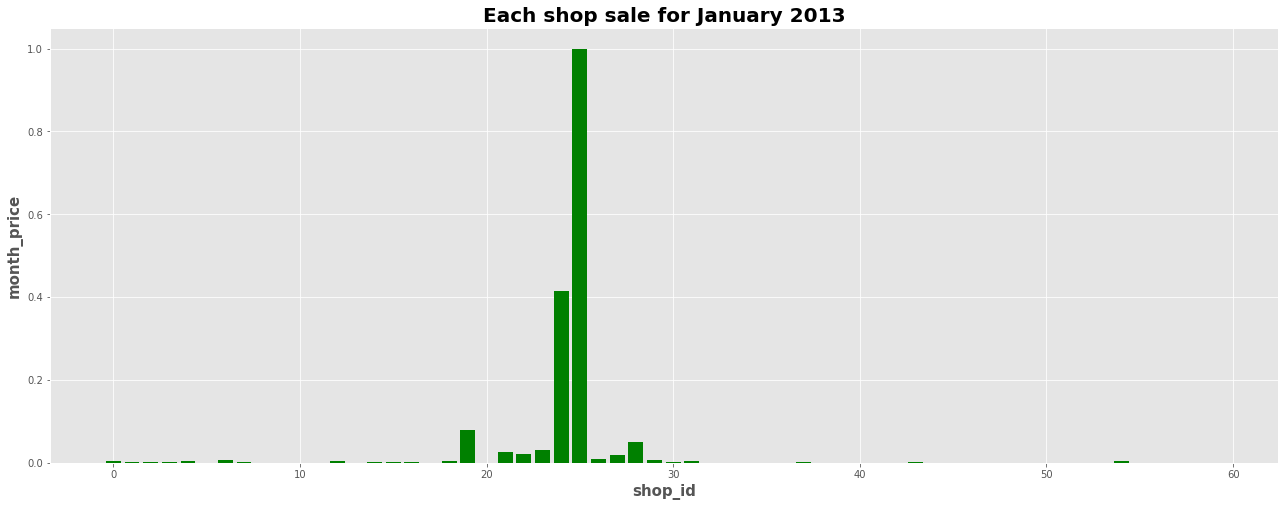

In [200]:
plt.style.use('ggplot')

x = list(y["shop_id"])
y = list((y["month_price"])/y["month_price"].max())

from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(22,8))
barWidth = 0.25
ax.bar(x , y, color='green')
plt.xlabel('shop_id', fontweight='bold', fontsize=15)
plt.ylabel("month_price", fontweight='bold',fontsize=15)
plt.title("Each shop sale for January 2013",fontweight='bold',fontsize=20)



In [201]:
pdata2015["month"].value_counts()

1.0     50
2.0     47
4.0     46
3.0     46
10.0    44
5.0     44
7.0     43
6.0     43
9.0     42
8.0     42
Name: month, dtype: int64

In [202]:
mon2015=pdata2015.sort_values("month").iloc[0:50,:]
mon2015.head()

Text(0.5,1,'Each shop sale for January 2015')

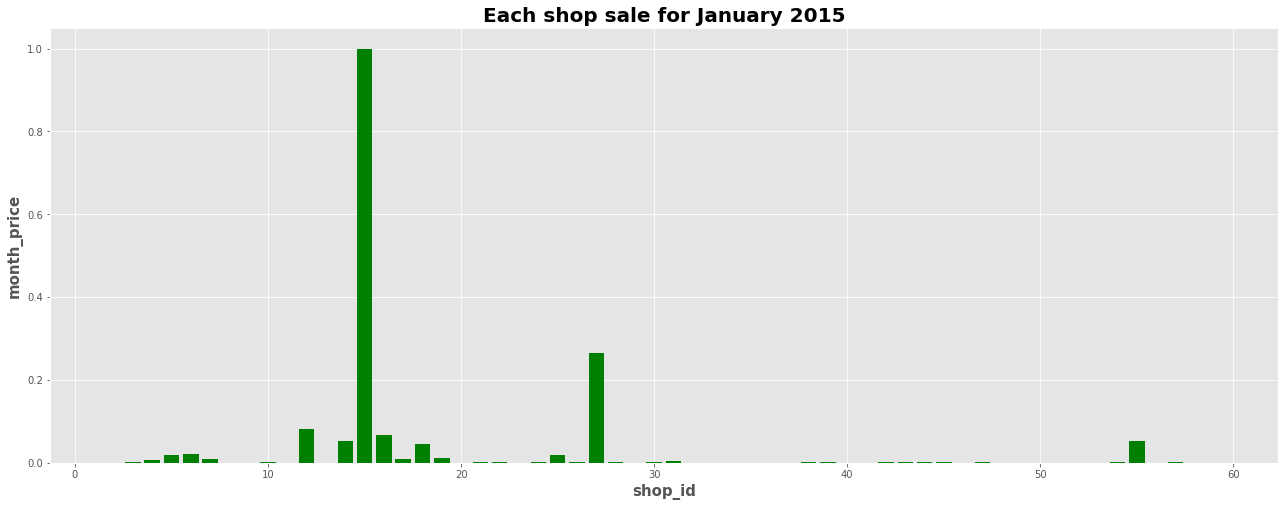

In [203]:

plt.style.use('ggplot')

x = list(mon2015["shop_id"])
y = list((mon2015["month_price"])/mon2015["month_price"].max())

from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(22,8))
barWidth = 0.25
ax.bar(x , y, color='green')
plt.xlabel('shop_id', fontweight='bold', fontsize=15)
plt.ylabel("month_price", fontweight='bold',fontsize=15)
plt.title("Each shop sale for January 2015",fontweight='bold',fontsize=20)

In [204]:
pdata2014["month"].value_counts()

10.0    52
8.0     51
12.0    50
11.0    50
9.0     50
7.0     49
6.0     48
5.0     48
4.0     48
3.0     47
2.0     46
1.0     46
Name: month, dtype: int64

In [205]:
mon2014=pdata2014.sort_values("month").iloc[0:46,:]
mon2014.head()

Text(0.5,1,'Each shop sale for January 2014')

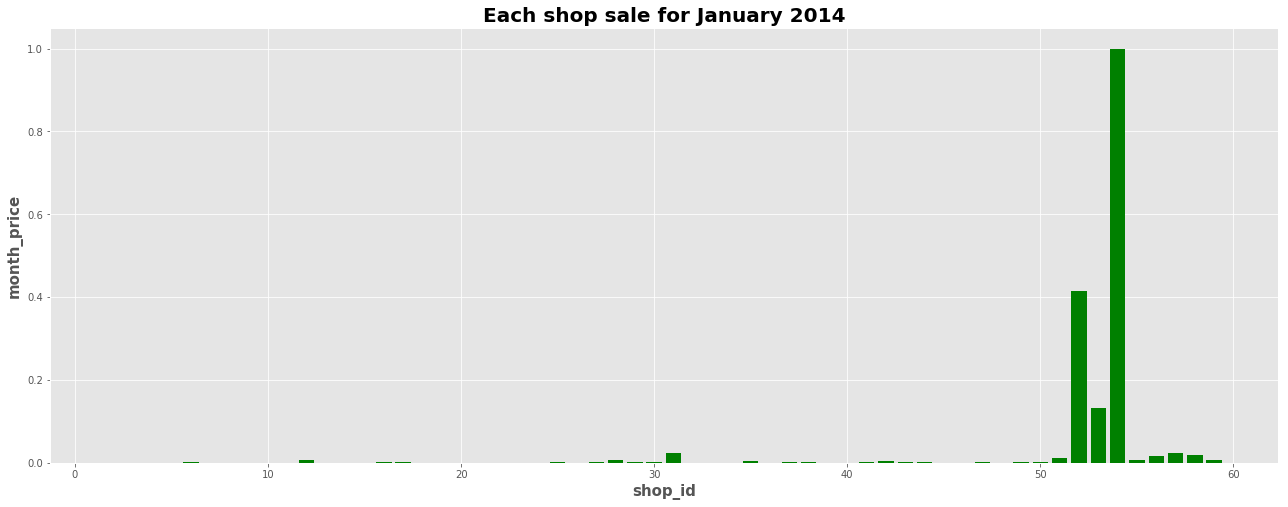

In [206]:
plt.style.use('ggplot')

x = list(mon2014["shop_id"])
y = list((mon2014["month_price"])/mon2014["month_price"].max())

from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(22,8))
barWidth = 0.25
ax.bar(x , y, color='green')
plt.xlabel('shop_id', fontweight='bold', fontsize=15)
plt.ylabel("month_price", fontweight='bold',fontsize=15)
plt.title("Each shop sale for January 2014",fontweight='bold',fontsize=20)

In [207]:
finaldata.to_csv('processed_sales.csv')


In [208]:
shopdummies=pd.get_dummies(finaldata["shop_id"])
monthdummies=pd.get_dummies(finaldata["month"])
yeardummies=pd.get_dummies(finaldata["year"])

In [209]:
finaldata=pd.concat([finaldata,shopdummies,monthdummies,yeardummies],axis=1)

In [210]:
finaldata=finaldata.drop(["month","year","shop_id"],axis=1)

In [211]:
finaldata.head(10)

,month_price,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,6.0,7.0,8.0,9.0,10.0,11.0,12.0,2013,2014,2015
0,31872.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,55011322.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,22762413.70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1712609.08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4326429.41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1162013.50,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,181086.62,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,1487927.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,2824582.03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,1030170.26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [258]:
y = np.array(finaldata["month_price"])
X = np.array(finaldata.drop(['month_price'], axis=1))

y = y / y.max()

In [259]:
from sklearn.decomposition import PCA
pca = PCA(n_components=38)
x = pca.fit_transform(X) 

In [260]:
x.shape

(1578, 38)

In [261]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

In [217]:
model = keras.models.Sequential([
    keras.layers.Dense(43,input_shape=(xtrain[0].shape), activation=tf.nn.relu,  kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(23,activation=tf.nn.relu,  kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dense(1)
])

In [218]:
model.compile(loss='mse',
             optimizer=keras.optimizers.Adam(0.001),
             metrics=['mae'])

In [219]:
history = model.fit(xtrain,ytrain, epochs=50, verbose=2)

Epoch 1/50
 - 0s - loss: 0.0793 - mean_absolute_error: 0.0728
Epoch 2/50
 - 0s - loss: 0.0633 - mean_absolute_error: 0.0468
Epoch 3/50
 - 0s - loss: 0.0524 - mean_absolute_error: 0.0388
Epoch 4/50
 - 0s - loss: 0.0436 - mean_absolute_error: 0.0361
Epoch 5/50
 - 0s - loss: 0.0364 - mean_absolute_error: 0.0335
Epoch 6/50
 - 0s - loss: 0.0307 - mean_absolute_error: 0.0304
Epoch 7/50
 - 0s - loss: 0.0261 - mean_absolute_error: 0.0303
Epoch 8/50
 - 0s - loss: 0.0224 - mean_absolute_error: 0.0297
Epoch 9/50
 - 0s - loss: 0.0195 - mean_absolute_error: 0.0285
Epoch 10/50
 - 0s - loss: 0.0171 - mean_absolute_error: 0.0297
Epoch 11/50
 - 0s - loss: 0.0153 - mean_absolute_error: 0.0297
Epoch 12/50
 - 0s - loss: 0.0138 - mean_absolute_error: 0.0299
Epoch 13/50
 - 0s - loss: 0.0127 - mean_absolute_error: 0.0277
Epoch 14/50
 - 0s - loss: 0.0117 - mean_absolute_error: 0.0285
Epoch 15/50
 - 0s - loss: 0.0108 - mean_absolute_error: 0.0287
Epoch 16/50
 - 0s - loss: 0.0102 - mean_absolute_error: 0.0276
E

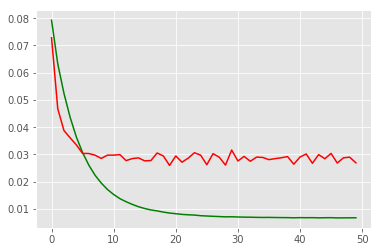

In [220]:
plt.plot(history.epoch, history.history['loss'], 'g')
plt.plot(history.epoch, history.history['mean_absolute_error'], 'r')

In [221]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error'])

In [222]:
model.evaluate(xtest, ytest)

474/474 [==============================] - 0s 157us/step


[0.007677058720733295, 0.04572427997420609]

In [223]:
model.save("sale_predictor.hfile")

array([[0.02538005],
       [0.05693432],
       [0.02976891]], dtype=float32)

# ----------------------------------------------------------------------------------------------------------